In [1]:
import pickle

configs=[(True,True),(False, True),(True, False), (False, False)]
data=[]
for max_length,fill_0 in configs:
    data.append(pickle.load(open(f't5-large_obqa_fact_epoch_1_{max_length}_{fill_0}_loss.pkl','rb')))




In [13]:
import numpy as np
from pandas import DataFrame
def get_str(flex_max_length, fill_0):
    return f"{'Flexible' if flex_max_length else 'Fixed'} Max Length-{'Filled' if fill_0 else 'Not filled'} with 0"

col_name=[]
di={'# Step':np.arange(len(data[0]))}
for idx,(Fixed,fill_0) in enumerate(configs):
    di[get_str(Fixed,fill_0)]=data[idx]

df=DataFrame(di).melt(id_vars='# Step',var_name='Methodology').rename(columns={'value':'Loss value'}) #value_vars=['Flexible Max Length-Fill 0']

In [14]:
accuracy=[[14,24,31,31,36,37],
    [44,55,62,60,62,66],
    [16,27,35,38,40,37],
    [39,49,50,51,58,63]]
steps=[150*(i+1) for i in range(len(accuracy[0]))]
di1={'# Step':steps}
for idx,(flex_max_length,fill_0) in enumerate(configs):
    di1[get_str(flex_max_length, fill_0)]=accuracy[idx]

df1=DataFrame(di1).melt(id_vars='# Step',var_name='Methodology').rename(columns={'value':'Accuracy'})
               


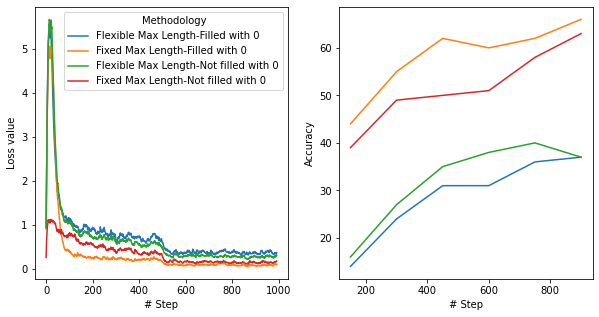

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(df, x='# Step',y='Loss value', hue='Methodology',ax=ax[0])
sns.lineplot(df1, x='# Step',y='Accuracy', hue='Methodology',ax=ax[1])
ax[1].legend().remove()

### Different scheme with fixed max length and filled 0

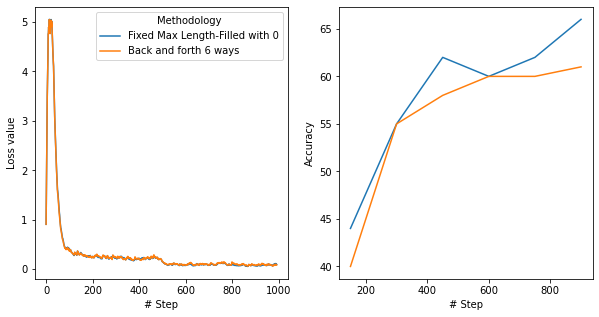

In [20]:
acc1=[[44,55,62,60,62,66],
          [40,55,58,60,60,61]]
data[1]
acc_df={'# Step':steps}
scheme_backforth='Back and forth 6 ways'
prime=get_str(flex_max_length=False, fill_0=True)
acc_df[prime]=acc1[0]
acc_df[scheme_backforth]=acc1[1]
acc_dfp=DataFrame(acc_df).melt(id_vars='# Step',var_name='Methodology').rename(columns={'value':'Accuracy'})
       
loss_df={'# Step':np.arange(len(data[1]))}
loss_df[prime]=data[1]
loss_df[scheme_backforth]=pickle.load(open(f'6way_new_t5-large_obqa_fact_epoch_1_loss.pkl','rb'))
loss_dfp=DataFrame(loss_df).melt(id_vars='# Step',var_name='Methodology').rename(columns={'value':'Loss value'}) #value_vars=['Flexible Max Length-Fill 0']
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(loss_dfp, x='# Step',y='Loss value', hue='Methodology',ax=ax[0])
sns.lineplot(acc_dfp, x='# Step',y='Accuracy', hue='Methodology',ax=ax[1])
ax[1].legend().remove()